# (Ford GoBike Trip Data)
## by (Moaz Taha)

## Preliminary Wrangling

> The data describes the trips made by the users of Ford Gobike service in February 2019.

In [324]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [325]:
df = pd.read_csv("fordgobike-tripdata.csv")
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [326]:
df.shape

(183412, 16)

In [327]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [328]:
# correct Dtype for start_time and end_time
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

In [329]:
df['start_time'].min(), df['start_time'].max()

(Timestamp('2019-02-01 00:00:20.636000'),
 Timestamp('2019-02-28 23:59:18.548000'))

In [330]:
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [331]:
# checking the missing values in members' gender and birth year
df[df['member_gender'].isna()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
13,915,2019-02-28 23:49:06.062,2019-03-01 00:04:21.867,252.0,Channing Way at Shattuck Ave,37.865847,-122.267443,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,5101,Subscriber,NaN,NaN,No
28,650,2019-02-28 23:43:27.503,2019-02-28 23:54:18.451,258.0,University Ave at Oxford St,37.872355,-122.266447,263.0,Channing Way at San Pablo Ave,37.862827,-122.290230,4784,Customer,NaN,NaN,No
53,3418,2019-02-28 22:41:16.362,2019-02-28 23:38:14.363,11.0,Davis St at Jackson St,37.797280,-122.398436,11.0,Davis St at Jackson St,37.797280,-122.398436,319,Customer,NaN,NaN,No
65,926,2019-02-28 23:17:05.853,2019-02-28 23:32:32.682,13.0,Commercial St at Montgomery St,37.794231,-122.402923,81.0,Berry St at 4th St,37.775880,-122.393170,2951,Subscriber,NaN,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183354,449,2019-02-01 01:35:07.663,2019-02-01 01:42:36.878,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,253.0,Haste St at College Ave,37.866418,-122.253799,5430,Customer,NaN,NaN,No
183356,795,2019-02-01 01:25:50.366,2019-02-01 01:39:05.950,368.0,Myrtle St at Polk St,37.785434,-122.419622,125.0,20th St at Bryant St,37.759200,-122.409851,5400,Subscriber,NaN,NaN,No
183363,673,2019-02-01 01:12:24.420,2019-02-01 01:23:37.645,75.0,Market St at Franklin St,37.773793,-122.421239,133.0,Valencia St at 22nd St,37.755213,-122.420975,5166,Customer,NaN,NaN,No
183371,196,2019-02-01 01:08:38.641,2019-02-01 01:11:54.949,58.0,Market St at 10th St,37.776619,-122.417385,75.0,Market St at Franklin St,37.773793,-122.421239,2395,Customer,NaN,NaN,No


In [332]:
df[df['member_gender'].isna()].user_type.value_counts()

Subscriber    5028
Customer      3237
Name: user_type, dtype: int64

The hypothesis was that memebers with missing data would most likey be customers not subscribers as subscribers should have input their infromation to sign up for the service. But the data shows that these 2 things are not correlated. 

In [333]:
# drop missing values
original_df = df.copy()
df.dropna(inplace=True)

In [334]:
df.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

### Converting some features to more interpretable units 

In [335]:
# age instead of year of birth
df['member_age'] = 2019 - df['member_birth_year'] # 2019 as the data was collected in 2019
df.drop('member_birth_year', axis=1, inplace=True)

# minutes instead of seconds 
df['duration_min'] = df['duration_sec'] / 60
df.drop('duration_sec', axis=1, inplace=True)

# ids to int
df['start_station_id'] = df['start_station_id'].astype(int)
df['end_station_id'] = df['end_station_id'].astype(int)

df.head(5)

,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_gender,bike_share_for_all_trip,member_age,duration_min
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,Male,No,35.0,869.750000
2,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,Male,No,47.0,1030.900000
3,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,Other,No,30.0,608.166667
4,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,Male,Yes,45.0,26.416667
5,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,Male,No,60.0,29.883333


In [336]:
df.shape

(174952, 16)

In [337]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   start_time               174952 non-null  datetime64[ns]
 1   end_time                 174952 non-null  datetime64[ns]
 2   start_station_id         174952 non-null  int64         
 3   start_station_name       174952 non-null  object        
 4   start_station_latitude   174952 non-null  float64       
 5   start_station_longitude  174952 non-null  float64       
 6   end_station_id           174952 non-null  int64         
 7   end_station_name         174952 non-null  object        
 8   end_station_latitude     174952 non-null  float64       
 9   end_station_longitude    174952 non-null  float64       
 10  bike_id                  174952 non-null  int64         
 11  user_type                174952 non-null  object        
 12  member_gender   

In [338]:
original_df.shape

(183412, 16)

### What is the structure of your dataset?

> the dataset contains 183412 rides (174952 after removing NaNs) data and member related data:
 - `start_time`, `end_time`: the starting and ending time of the ride.
 - `start_station_id`, `end_station_id`: the id of the starting and ending stations.
 - `start_station_name`, `end_station_name`: the name of the starting and ending stations.
 - `start_station_latitude`, `end_station_latitude`, `start_station_longitude`, `end_station_longitude`: the latitude and longitude of the starting and ending stations.
 - `bike_id`: the id of the bike used in the ride.
 - `user_type`: the type of the member (Subscriber / Customer).
 - `member_gender`: the gender of the member.
 - `bike_share_for_all_tripe`: if the user is enroled in the program for low income residents.
 - `member_birth_year`: the birth year of the user -> replaced by `member_age` the actual age of the user.
 - `duration_sec`: the duration of the rides in seconds -> replaced by `duration_min` the duration in minutes.

### What is/are the main feature(s) of interest in your dataset?

> The main feature I'm interested in is the duration of the rides and the factors that affect it.
 
> I'm also interested in what type of people uses the service and when but the lack of user identifier makes it harder as many of the data points may be coming from the same user and we can't figure which user.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think the locations of the starting and ending stations should have the biggest effect, also the starting and ending times as some hours of the day has more traffic than others which may affect the ride duration. The type of the user, gender and age could also have an effect.
 - `start_station_name`, `end_station_name`
 - `duration_min`, `member_gender`, `member_age`, `user_type`

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [339]:
# drop the features I won't be using 
drop_features = ['bike_id', 'end_station_latitude', 'start_station_latitude', 'end_station_longitude', 'start_station_longitude']
df.drop(drop_features, axis=1, inplace=True)

### Ride Duration Distrubtion 

In [340]:
df['duration_min'].describe()

count    174952.000000
mean         11.733379
std          27.370082
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: duration_min, dtype: float64

In [341]:
np.log10(df['duration_min'].describe())

count    5.242919
mean     1.069423
std      1.437276
min      0.007179
25%      0.731051
50%      0.929419
75%      1.118926
max      3.148952
Name: duration_min, dtype: float64

In [342]:
bins = 10 ** np.arange(0, 3.1+.1, .1)
ticks = [1, 2, 3, 5, 7, 12, 20, 40, 60, 100, 200, 500, 1400]
labels = ["{}".format(v) for v in ticks]

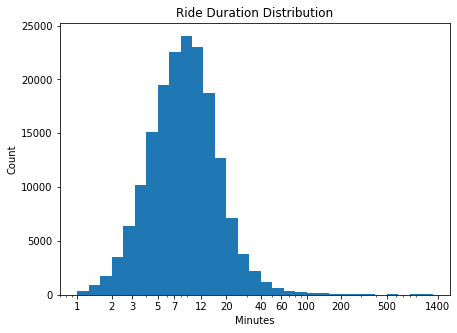

In [343]:
plt.figure(figsize=(7, 5))
plt.hist(data=df, x='duration_min', bins=bins)
plt.title("Ride Duration Distribution")
plt.xlabel("Minutes")
plt.ylabel("Count")
plt.xscale("log")
plt.xticks(ticks, labels)
plt.show()

The duration data was really skewed to the right so I applied a log scaling to it and it follows a log normal distribution. We can see that most of the rides lasts between 7-12 minutes.

Also a few number of rides were above 100 minutes and going way up till 1400, as these rides are a few and not rare so I don't think they are errors in the data, they may be some long distance marathons or organized events or that some people kept the bikes with them overnight.

### Members
- Gender
- Age
- Type

#### Members Gender Distribution 

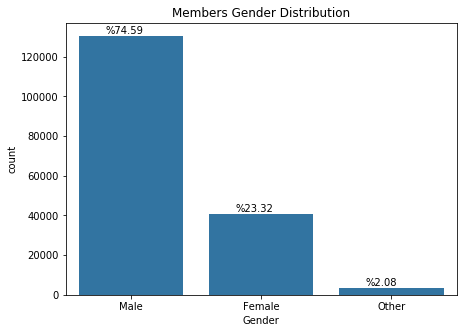

In [344]:
# gender distribution
plt.figure(figsize=(7, 5))
color = sb.color_palette()[0]
ax = sb.countplot(data=df, x='member_gender', order=["Male", "Female", "Other"], color=color)
plt.title("Members Gender Distribution")
for p in ax.patches:
        ax.annotate('%{:.2f}'.format(p.get_height() / df.shape[0] * 100), (p.get_x()+0.2, p.get_height()+1000))
    
plt.xlabel("Gender")
plt.show()

most of the rides were made by males 74.59% and 23.32% by females and only 2% by other. We can relate this information later to age of the members and how they affected the duration of the rides.

#### Members Age Disribution 

In [345]:
df['member_age'].describe()

count    174952.000000
mean         34.196865
std          10.118731
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: member_age, dtype: float64

In [346]:
df['member_age'].sort_values(ascending=False)[:10]

27370     141.0
60960     119.0
21506     119.0
94326     119.0
122194    119.0
41319     119.0
58222     119.0
38932     119.0
19375     119.0
107619    119.0
Name: member_age, dtype: float64

In [347]:
df[df['member_age'] == 141]

,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_gender,bike_share_for_all_trip,member_age,duration_min
27370,2019-02-25 09:28:42.161,2019-02-25 09:53:17.068,15,San Francisco Ferry Building (Harry Bridges Pl...,386,24th St at Bartlett St,Customer,Female,No,141.0,24.566667


In [348]:
bins = np.arange(18, 141, 2)
ticks = [18, 20, 25, 30, 35, 40, 50, 60, 70, 100, 120, 140]
labels = ["{}".format(v) for v in ticks]

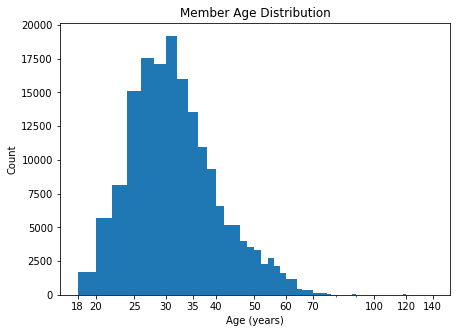

In [349]:
plt.figure(figsize=(7, 5))
plt.hist(data=df, x='member_age', bins=bins)
plt.xscale("log")
plt.xticks(ticks, labels)
plt.title("Member Age Distribution")
plt.xlabel("Age (years)")
plt.ylabel("Count")
plt.show()

The data has close to log normal disribution with some points skewed the right.
Most of the members are between age 25 to 35 and we can see that the service is only available to 18 years old or older.

We can also see that very a few rides were made by people older than 60. 

And We have some some really high ages like 119 and 141 and these may be some mistakes made by the users like typing 141 instead of 41 or someone joking. But still the rest of the information can be used.

#### Members Type Distribution 

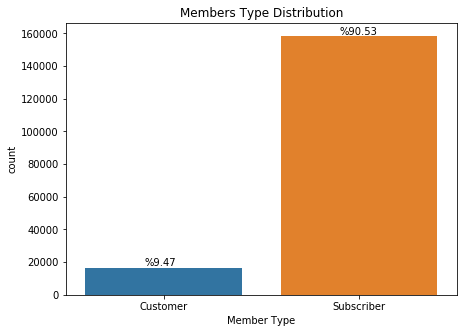

In [350]:
# user type distribution
plt.figure(figsize=(7, 5))
ax = sb.countplot(data=df, x='user_type')
plt.title("Members Type Distribution")
for p in ax.patches:
        ax.annotate('%{:.2f}'.format(p.get_height() / df.shape[0] * 100), (p.get_x()+0.3, p.get_height()+1000))
    
plt.xlabel("Member Type")
plt.show()

The majority of the rides are made by subscribers to the service, This may affect the duration as these people use the service regulary and may be familiar with the roads and routes.

### Stations Distributions 
- Starting Stations - Top 10
- Ending Stations - Top 10

In [422]:
top_10_starting_ids = df['start_station_id'].value_counts().reset_index()[:10]['index'].values
top_10_starting = df[df['start_station_id'].isin(top_10_starting_ids)]
top_10_starting_order = top_10_starting.start_station_name.value_counts().index

top_10_ending_ids = df['end_station_id'].value_counts().reset_index()[:10]['index'].values
top_10_ending = df[df['end_station_id'].isin(top_10_ending_ids)]
top_10_ending_order = top_10_ending.end_station_name.value_counts().index

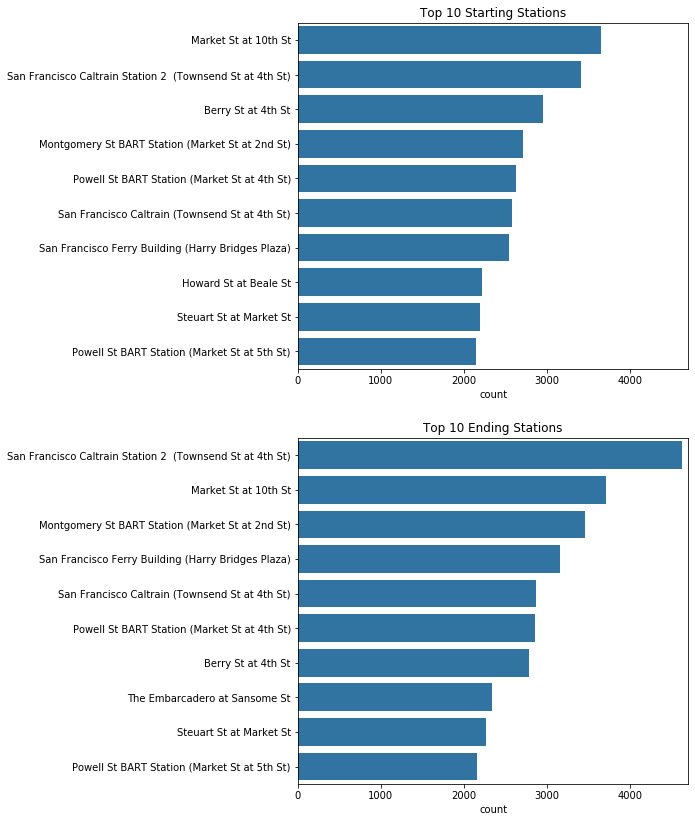

In [460]:
plt.figure(figsize=(7, 14))
plt.subplot(2, 1, 1)
plt.title("Top 10 Starting Stations")
sb.countplot(data=top_10_starting, y='start_station_name', color=color, order=top_10_starting_order)
plt.ylabel(None)
plt.xlim((0, 4700))


plt.subplot(2, 1, 2)
plt.title("Top 10 Ending Stations")
sb.countplot(data=top_10_ending , y='end_station_name', color=color, order=top_10_ending_order)
plt.ylabel(None)
plt.xlim((0, 4700))
plt.show()

In [459]:
# stations with the most traffic (start/end)
intersection_stations = list(set(top_10_ending_ids) & set(top_10_starting_ids))
df[df['start_station_id'].isin(intersection_stations)].start_station_name.unique()

array(['Montgomery St BART Station (Market St at 2nd St)',
       'Market St at 10th St',
       'San Francisco Ferry Building (Harry Bridges Plaza)',
       'San Francisco Caltrain (Townsend St at 4th St)',
       'San Francisco Caltrain Station 2  (Townsend St at 4th St)',
       'Powell St BART Station (Market St at 5th St)',
       'Steuart St at Market St',
       'Powell St BART Station (Market St at 4th St)',
       'Berry St at 4th St'], dtype=object)

We can see that stations like `San Francisco Caltrain Station 2` and `Market St` has the most traffic whether it's starting or ending. The same goes for the rest of the top 10 starting and ending lists. which means that these are the most active stations so it might be helpful to see how the duration relates to this information.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!